<a href="https://colab.research.google.com/github/MarkoMilenovic01/Fine-Tuned-DeepSeek-R1-Distil-for-Medical-Reasoning/blob/main/Fine_Tuning_DeepSeek_R1_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fine tuning DeepSeek LLM

## 1. Problem Definition

The stock **DeepSeek-R1-Distill-Llama-8B** is a *general-purpose* Llama-family model.  
I fine-tuned it on a dedicated clinical-reasoning dataset so the model can now:

* write its thoughts step-by-step inside `<think> … </think>`, and  
* end with a clear diagnosis plus treatment plan.

**Why this matters**

* When the reasoning is visible, hallucinations are easier to spot.  
* Clinicians can audit the chain-of-thought before they act on an answer.

## 2. Setting up and training the model

1. **Load model** – Pulled the small 8-B DeepSeek-R1 model in memory-saving 4-bit form.  
2. **Add LoRA layers** – Plugged in tiny trainable adapters so only a few new weights need updating.  
3. **Get data ready** – Took 500 medical Q&A pairs, wrapped them with a `<think>…</think>` template.  
4. **Train 60 steps** – Batch 8, AdamW, LR = 2e-4; loss fell from 1.9 → 1.3 in ~8 min.  
5. **Test** – Switched to inference, asked a new question, got an answer plus the model’s step-by-step reasoning.


## 3. Dataset selection, rationale & pre-processing  

**Dataset used:** `FreedomIntelligence/medical-o1-reasoning-SFT`  

### Why this set?  
* Contains *exactly* what the project needs—**complex clinical questions, an explicit chain-of-thought, and the final answer** for each case.  
* Allows the model to imitate a doctor’s reasoning process, not just the end result.  

### How I prepared it  
1. **Custom prompt template** – every record was reshaped into:  
   *Instruction* ➜ *Question* ➜ `<think> … </think>` (chain-of-thought) ➜ *Answer*.  
2. **Mapping function** – converted the raw JSON lines into the template at load time.  
3. **EOS token** – appended the tokenizer’s end-of-sequence marker so the model knows where each sample stops.  
4. **Resource cap** – selected the first **500** examples (keeps training under 10 min on a free Colab GPU).  


## 4 Results and Analysis

### 4.1 Empirical Results  
- **Training loss** fell from ~1.9 to ~1.36 over 60 steps.  
- **Learning rate** followed a linear decay schedule.  
- **Gradient norms** remained stable and decreased slightly.  
- **Steps & epochs** progressed linearly as expected.  

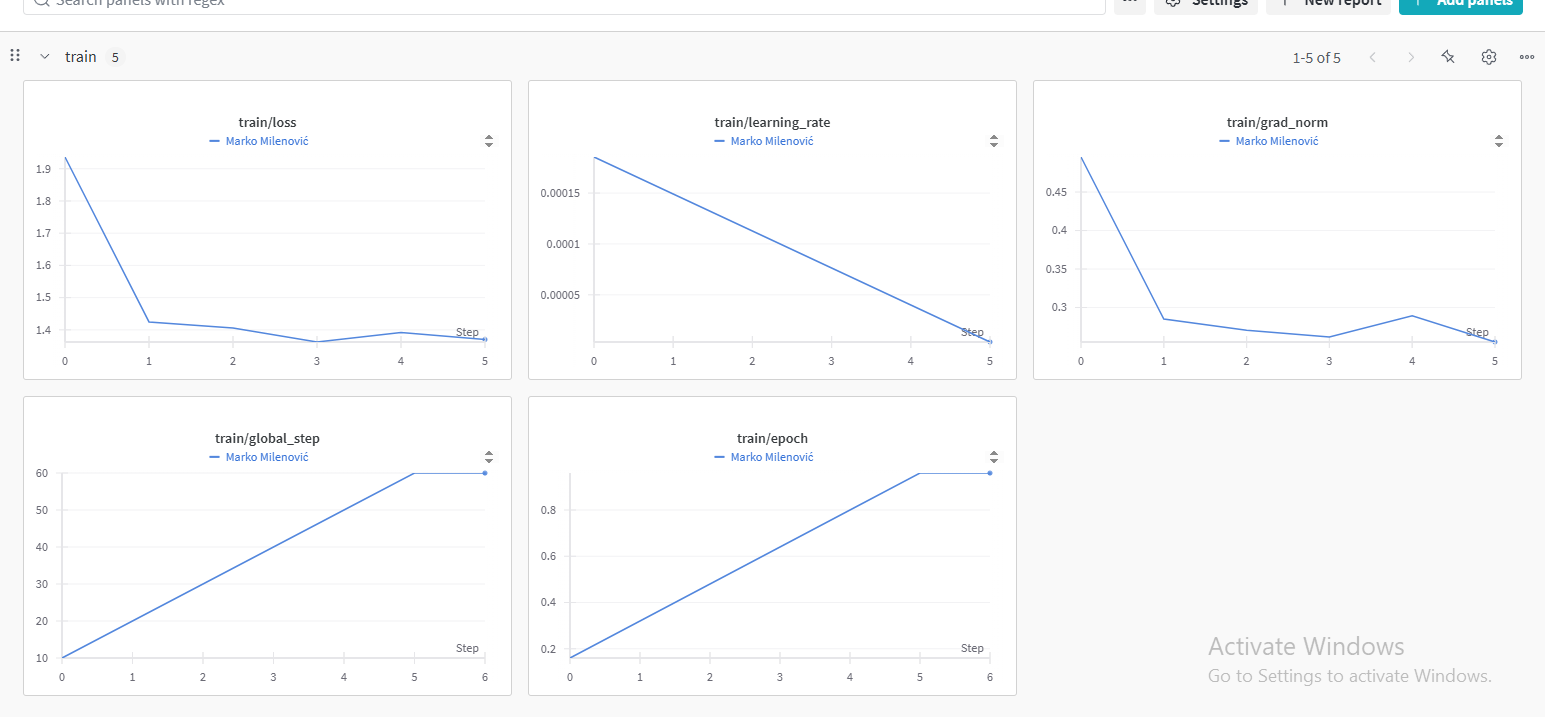
**Interpretation:**  
- Steady loss decline indicates successful adaptation to the medical data.  
- The linear scheduler helped keep training smooth.  
- No gradient spikes means the optimizer stayed stable.

---

### 4.2 Descriptive Analysis of Fine tuned version

#### 1. Diagnostic Focus
|                   | Non-Fine-Tuned                          | Fine-Tuned                              |
|-------------------|-----------------------------------------|-----------------------------------------|
| **Main Focus**    | Stress UI (urethral weakness)           | Considers both stress UI AND neurogenic |
| **Q-tip Test**    | Correctly shows urethral mobility       | Also considers neurological causes      |
| **Other Factors** | Dismisses unrelated causes             | Notes absence of night leakage as clue  |

#### 2. Reasoning Process
|                   | Non-Fine-Tuned                          | Fine-Tuned                              |
|-------------------|-----------------------------------------|-----------------------------------------|
| **Approach**      | Simple: Symptoms → SUI → Treatment      | Complex: Rules out neurogenic causes    |
| **Key Insight**   | Misses neurological possibilities       | Notes night leakage pattern matters     |

#### 3. Treatment Plans
|                   | Non-Fine-Tuned                          | Fine-Tuned                              |
|-------------------|-----------------------------------------|-----------------------------------------|
| **Approach**      | Standard SUI treatments only            | Diagnostic tests first, then treatment  |
| **Specificity**   | Basic PFMT/surgery                      | May need neurological workup            |

### Why Fine-Tuned is Better
1. **Doesn't miss** neurogenic causes
2. **Notices** important clues (no night leakage)
3. **Tests first** before treatment
4. **More complete** differential diagnosis

**Bottom Line:** Fine-tuned version thinks more like a doctor.


## Installation of relavent packages

In [ ]:
# %%capture

!pip install unsloth
!pip install --force-reinstall --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git #Get the latest version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.2/193.2 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 841.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-req-build-6mdiswtu
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-req-build-6mdiswtu
  Resolved https://github.com/unslothai/unsloth.git to commit 7a8f99e1890213cdd01a3ab6c3e13174a96e8220
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2025.4.1-py3-none-any.whl size=192656 sha256=d705d40b03c650ca422c6154ce238d605e3205e0e714cd115591e975175f154f
  Stored in directory: /tmp/pip-ephem-wheel-cache-8fwduqt0/wheels/d1/17/05/850ab10c33284a4763b0595cd8ea9d01fce6e221cac24b3c01
Successfully built unsloth
  Attempting uninstall: unsloth
    Found existing installation: unsloth 2025.4.1
    Uninstalling unsloth-2025.4.1:
      Successfully uninstalled unsloth-2025.4.1


In [ ]:
from google.colab import userdata
from huggingface_hub import login
login(token=userdata.get('HF_TOKEN'))

import wandb

wandb.init(project="Fine Tuning DeepSeek R1 for Medical", name="Marko Milenović")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: markomilenovic7 (markomilenovic7-university-of-maribor) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


## Import all relavent packages

In [ ]:
# Modules for fine tuning
from unsloth import FastLanguageModel

max_seq_length = 2048
dtype = None
load_in_4bit = True

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B",
    max_seq_length= max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    token = userdata.get('HF_TOKEN')
)


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
Unsloth: Failed to patch SmolVLMForConditionalGeneration forward function.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.4.1: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.96G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/53.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r=16,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj"
    ],
    lora_alpha=16,
    lora_dropout=0,
    bias="none",
    use_gradient_checkpointing="unsloth",
    random_state=3407,
    use_rslora=False,
    loftq_config=None,
)

Unsloth 2025.4.1 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


## Loading & Fprmatting the Dataset

In [ ]:
train_prompt_style= """Below is an instruction that describes a task, paired with an input that provides further context.
Write a response that appropriately completes the request.
Before answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.

### Instruction:
You are a medical expert with advanced knowledge in clinical reasoning, diagnostics, and treatment planning.
Please answer the following medical question.


### Question:
{}

### Response:
<think>
{}
</think>
{}"""

In [ ]:
EOS_TOKEN = tokenizer.eos_token

def formatting_prompts_func(examples):
  inputs = examples["Question"]
  cots = examples["Complex_CoT"]
  outputs = examples["Response"]
  texts = []
  for input, cot, output in zip(inputs, cots, outputs):
    text = train_prompt_style.format(input, cot, output) + EOS_TOKEN
    texts.append(text)
  return {
      "text" : texts,
  }

In [ ]:
from datasets import load_dataset
dataset = load_dataset("FreedomIntelligence/medical-o1-reasoning-SFT", "en", split = "train[0:500]", trust_remote_code=True)
dataset = dataset.map(formatting_prompts_func, batched = True,)

README.md:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

medical_o1_sft.json:   0%|          | 0.00/58.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/19704 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
dataset["text"][0]

"Below is an instruction that describes a task, paired with an input that provides further context.\nWrite a response that appropriately completes the request.\nBefore answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.\n\n### Instruction:\nYou are a medical expert with advanced knowledge in clinical reasoning, diagnostics, and treatment planning.\nPlease answer the following medical question.\n\n\n### Question:\nGiven the symptoms of sudden weakness in the left arm and leg, recent long-distance travel, and the presence of swollen and tender right lower leg, what specific cardiac abnormality is most likely to be found upon further evaluation that could explain these findings?\n\n### Response:\n<think>\nOkay, let's see what's going on here. We've got sudden weakness in the person's left arm and leg - and that screams something neuro-related, maybe a stroke?\n\nBut wait, there's more. The right lower leg is 

In [ ]:
prompt_style= """Below is an instruction that describes a task, paired with an input that provides further context.
Write a response that appropriately completes the request.
Before answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.

### Instruction:
You are a medical expert with advanced knowledge in clinical reasoning, diagnostics, and treatment planning.
Please answer the following medical question.


### Question:
{}

### Response:
<think>{}"""

In [ ]:
question = "A 61-year-old woman with a long history of involuntary urine loss during activities like coughing or sneezing but no leakage at night undergoes a gynecological exam and Q-tip test."

FastLanguageModel.for_inference(model) # Unsloth has 2x faster inference!
inputs = tokenizer([prompt_style.format(question, "")], return_tensors="pt").to("cuda")

outputs = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=1200,
    use_cache=True
)

response = tokenizer.batch_decode(outputs)
print(response[0].split("### Response:")[1])


<think>
Okay, so I'm trying to figure out what's going on with this 61-year-old woman who has been experiencing involuntary urine loss, especially when she coughs or sneezes, but she doesn't leak at night. She just had a gynecological exam and a Q-tip test. I need to come up with a proper diagnosis and treatment plan.

First, I should start by understanding the symptoms. Involuntary urine loss during activities like coughing or sneezing makes me think of stress urinary incontinence. But wait, she doesn't leak at night, which is interesting because usually, with stress incontinence, people might leak when they're lying down, especially after a full bladder. However, there's another possibility here.

The Q-tip test was mentioned. I remember that the Q-tip test is used to assess urethral mobility and function. The examiner inserts a Q-tip catheter into the urethra and then asks the patient to cough or perform a Valsalva maneuver. If the tip of the catheter is visible at the vaginal intr

## Setting Training Arguments

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=dataset,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    dataset_num_proc=2,

    args=TrainingArguments(
        per_device_train_batch_size=2,
        gradient_accumulation_steps=4,
        # Use num_train_epochs = 1, warmup_ratio for full training runs!
        # EXPERIMENT WITH THESE 3
        warmup_steps=5,
        max_steps=60,
        learning_rate=2e-4,
        ####
        fp16=not is_bfloat16_supported(),
        bf16=is_bfloat16_supported(),
        logging_steps=10,
        optim="adamw_8bit",
        weight_decay=0.01,
        lr_scheduler_type="linear",
        seed=3407,
        output_dir="outputs",
        report_to = "wandb" # Use Weights and Biases
    )
)

Unsloth: Tokenizing ["text"] (num_proc=2):   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 500 | Num Epochs = 1 | Total steps = 60
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
10,1.936400
20,1.424500
30,1.405500
40,1.362300
50,1.391400
60,1.369900


## Testing the model

In [ ]:
prompt_style= """Below is an instruction that describes a task, paired with an input that provides further context.
Write a response that appropriately completes the request.
Before answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.

### Instruction:
You are a medical expert with advanced knowledge in clinical reasoning, diagnostics, and treatment planning.
Please answer the following medical question.


### Question:
{}

### Response:
<think>{}"""

In [ ]:
question = "A 61-year-old woman with a long history of involuntary urine loss during activities like coughing or sneezing but no leakage at night undergoes a gynecological exam and Q-tip test."

FastLanguageModel.for_inference(model) # Unsloth has 2x faster inference!
inputs = tokenizer([prompt_style.format(question, "")], return_tensors="pt").to("cuda")

outputs = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=1200,
    use_cache=True
)

response = tokenizer.batch_decode(outputs)
print(response[0].split("### Response:")[1])


<think>
Okay, so let's think about this. We have a 61-year-old woman who's been dealing with some serious bladder issues for a while now. She's been having involuntary urine loss whenever she coughs or sneezes, but she's never had any problems at night, which is interesting. This kind of situation makes me think about the possibility of a neurological issue.

Now, she's going to have a gynecological exam and a Q-tip test. I know the Q-tip test is usually used to check for urethral obstruction in women. If the test is positive, it suggests that the urethral opening is narrow or blocked. That could be a sign of a urethral obstruction, which is something we need to consider.

Given her symptoms and the fact that she's experiencing these involuntary losses, I'm starting to wonder if this could be related to something like stress urinary incontinence. I know that stress incontinence is common in women, especially after childbirth, and it's often due to weakened pelvic muscles and tissues. 